In [2]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

2025-02-26 01:53:47.321977: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-26 01:53:47.414936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740527627.449894   18979 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740527627.465261   18979 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 01:53:47.553483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Download and load the MNIST dataset (Handwritten digits)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Normalize the pixel values from 0-255 to 0-1
X_train =X_train/255
X_test =X_test/255

In [5]:
# the Data shapes
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(10000, 28, 28) (60000, 28, 28) (10000,) (60000,)


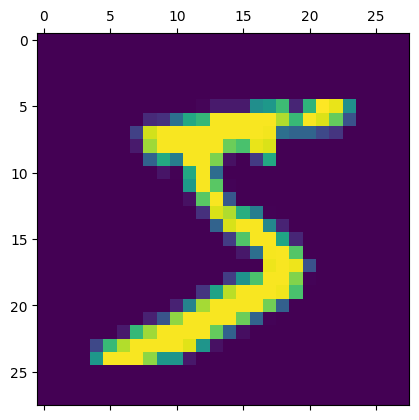

5


In [6]:
# What the Dataset looks like
plt.matshow(X_train[0])
plt.show()
print(y_train[0])

In [7]:
# reshaping the image to matrix
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_train_flatten.shape, X_test_flatten.shape # to be 784 neurons in the input layer

((60000, 784), (10000, 784))

I0000 00:00:1740527631.010570   18979 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1796 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/5


I0000 00:00:1740527632.466719   20625 service.cc:148] XLA service 0x72673401d1e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740527632.466842   20625 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-02-26 01:53:52.485239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740527632.577997   20625 cuda_dnn.cc:529] Loaded cuDNN version 90300


 134/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6290 - loss: 1.2477

I0000 00:00:1740527633.831251   20625 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8789 - loss: 0.4107 - val_accuracy: 0.9654 - val_loss: 0.1185
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.1035 - val_accuracy: 0.9702 - val_loss: 0.0946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9784 - loss: 0.0707 - val_accuracy: 0.9740 - val_loss: 0.0846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0506 - val_accuracy: 0.9729 - val_loss: 0.0896
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9765 - val_loss: 0.0864


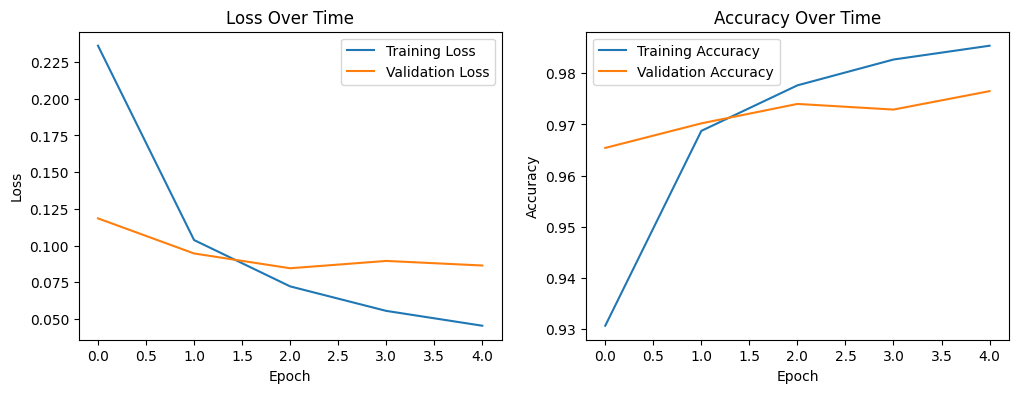

In [8]:
# Define the model architecture using Keras Sequential API
model = tf.keras.models.Sequential(
    [       
        tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# Compile the model with the appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the training data and validate it with the test data
history = model.fit(X_train_flatten, y_train, epochs=5, validation_data=(X_test_flatten, y_test))

plt.figure(figsize=(12, 4))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# Evaluate the model on the test data to see how well it performed
model.evaluate(X_test_flatten, y_test)

y_pred = model.predict(X_test_flatten)

y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the accuracy and confusion matrix
print(classification_report(y_test, y_pred))

# Calculate the accuracy and confusion matrix
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9710 - loss: 0.1060  
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1  

(0.9765,
 array([[ 965,    0,    1,    3,    2,    2,    2,    1,    1,    3],
        [   0, 1130,    0,    0,    0,    2,    2,    0,    1,    0],
        [   3,    5, 1005,    3,    1,    1,    0,   10,    4,    0],
        [   0,    0,    4,  976,    0,   11,    0,    6,    5,    8],
        [   1,    0,    6,    0,  952,    1,    3,    1,    1,   17],
        [   1,    0,    0,    2,    1,  876,    6,    1,    3,    2],
        [   4,    2,    1,    1,   11,    4,  933,    0,    2,    0],
        [   1,    2,    7,    0,    1,    0,    0, 1009,    2,    6],
        [   4,    1,    4,    5,    6,    3,    1,    7,  935,    8],
        [   0,    5,    1,    0,    9,    5,    0,    5,    0,  984]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


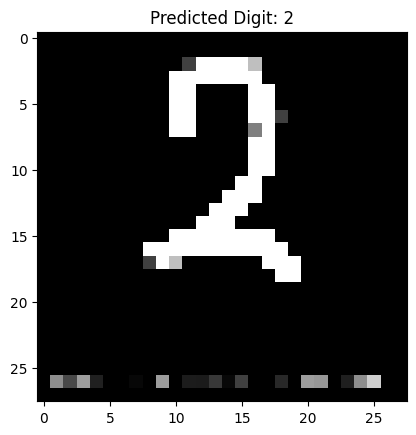

In [10]:
# Draw a digit using the cv2 to predict
import cv2

canvas = np.ones((280, 280), dtype="uint8") * 255
drawing = False

# Mouse callback function to draw
def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, (0,), -1)  # Draw thick black lines
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

    # Display the predict and clear for user instructions
cv2.putText(canvas, "Press 'p' to predict, 'c' to clear", (10, 270), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,), 1, cv2.LINE_AA)

# Open the drawing window
cv2.namedWindow("Draw a Digit")
cv2.setMouseCallback("Draw a Digit", draw)

while True:
    cv2.imshow("Draw a Digit", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("p"):  # Press 'p' to predict
        break
    elif key == ord("c"):  # Press 'c' to clear
        canvas[:] = 255  # Reset canvas

cv2.destroyAllWindows()

# Preprocess the drawn image for prediction
digit = cv2.resize(canvas, (28, 28))  # Resize to 28x28
digit = digit / 255  # Normalize
digit = 1 - digit  # Invert colors (MNIST digits are white on black)
digit = digit.reshape(1, 28*28)  # Reshape for the model

# Predict the digit
prediction = model.predict(digit)
predicted_digit = np.argmax(prediction)

# Show the drawn image and prediction
plt.imshow(digit.reshape(28, 28), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()